In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

import matplotlib.pyplot as plt

In [1]:
import os
import pandas as pd

# Initialize an empty DataFrame to store the merged data
merged_data = pd.read_csv("merged_data.csv")

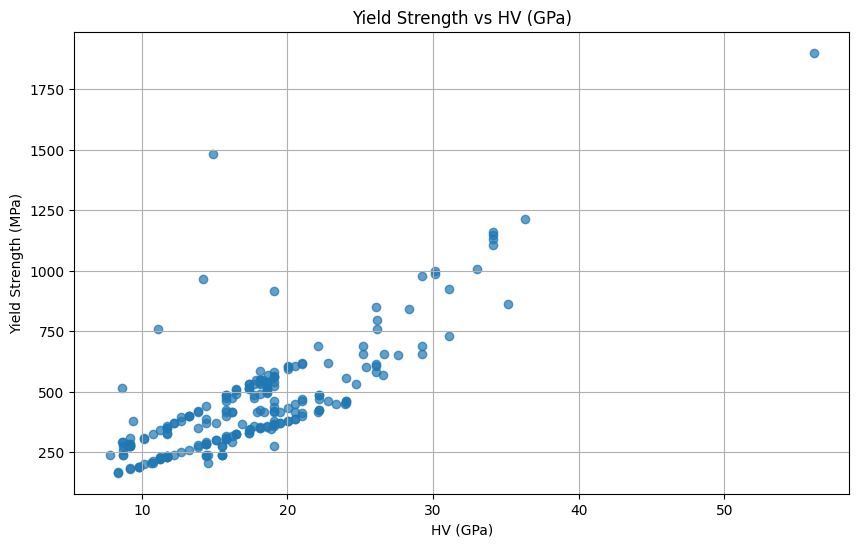

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['HV (GPa)'],merged_data['Yield Strength (MPa)'] , alpha=0.7)
plt.title('Yield Strength vs HV (GPa)')
plt.ylabel('Yield Strength (MPa)')
plt.xlabel('HV (GPa)')
plt.grid(True)
plt.show()

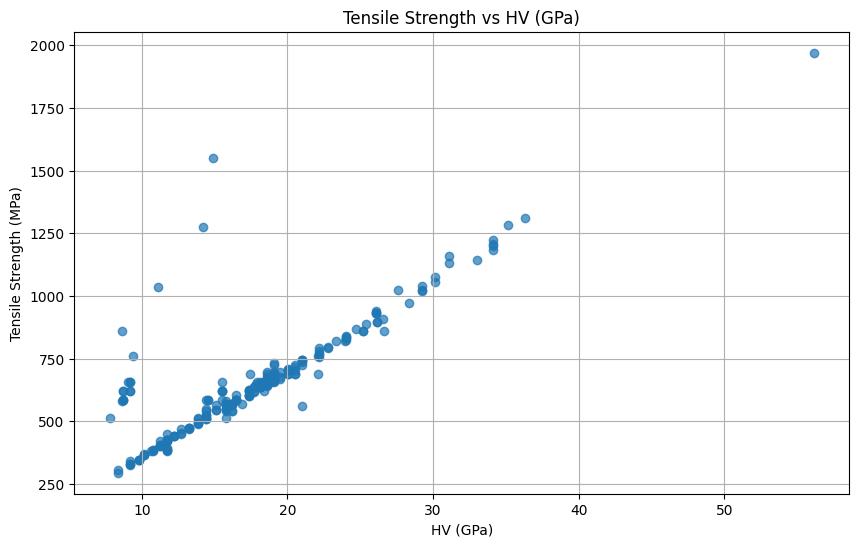

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['HV (GPa)'],merged_data['Tensile Strength (MPa)'], alpha=0.7)
plt.title('Tensile Strength vs HV (GPa)')
plt.ylabel('Tensile Strength (MPa)')
plt.xlabel('HV (GPa)')
plt.grid(True)
plt.show()

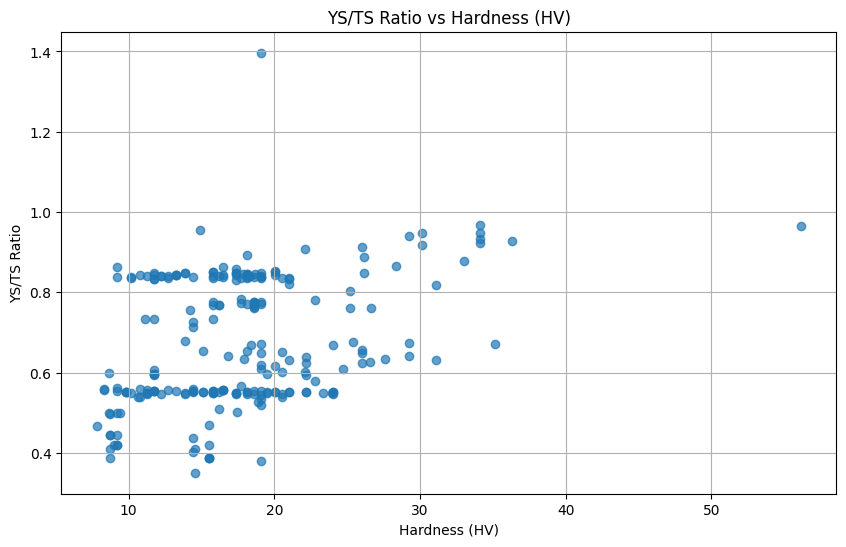

In [4]:
# Calculate YS/TS ratio
merged_data['YS/TS Ratio'] = merged_data['Yield Strength (MPa)'] / merged_data['Tensile Strength (MPa)']

# Plot YS/TS Ratio vs Hardness
plt.figure(figsize=(10, 6))
plt.scatter( merged_data['HV (GPa)'],merged_data['YS/TS Ratio'], alpha=0.7)
plt.title('YS/TS Ratio vs Hardness (HV)')
plt.ylabel('YS/TS Ratio')
plt.xlabel('Hardness (HV)')
plt.grid(True)
plt.show()

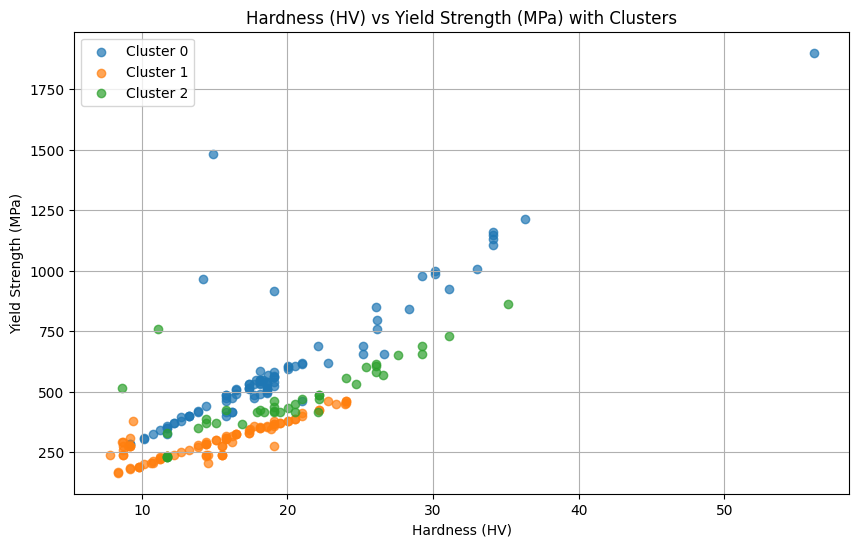

In [13]:
# Perform clustering using YS/TS Ratio
kmeans_ys_ts = KMeans(n_clusters=3, random_state=42)
merged_data['Cluster_YS_TS'] = kmeans_ys_ts.fit_predict(merged_data[['YS/TS Ratio']])

# Plot Hardness (HV) vs Yield Strength (MPa) with clusters
plt.figure(figsize=(10, 6))
for cluster in merged_data['Cluster_YS_TS'].unique():
    cluster_data = merged_data[merged_data['Cluster_YS_TS'] == cluster]
    plt.scatter( cluster_data['HV (GPa)'],cluster_data['Yield Strength (MPa)'], label=f'Cluster {cluster}', alpha=0.7)

plt.title('Hardness (HV) vs Yield Strength (MPa) with Clusters')
plt.ylabel('Yield Strength (MPa)')
plt.xlabel('Hardness (HV)')
plt.legend()
plt.grid(True)
plt.show()

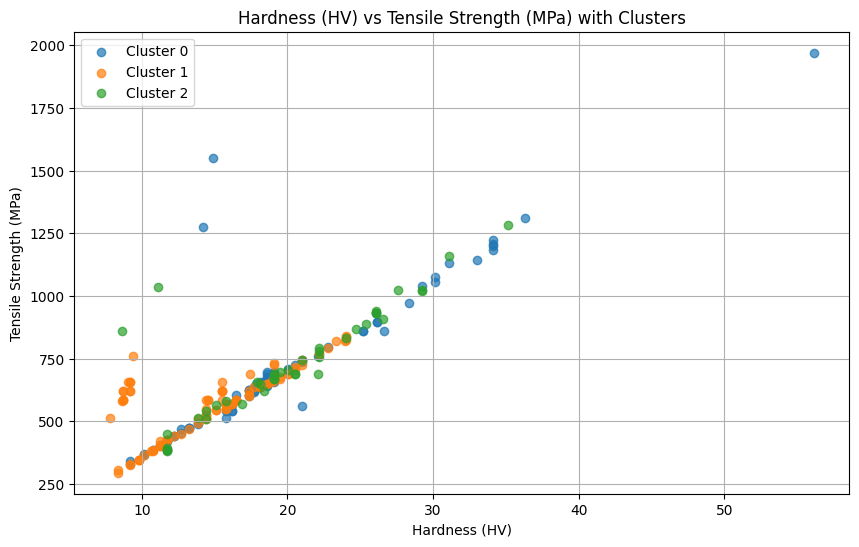

In [14]:
# Perform clustering using YS/TS Ratio
kmeans_ys_ts = KMeans(n_clusters=3, random_state=42)
merged_data['Cluster_YS_TS'] = kmeans_ys_ts.fit_predict(merged_data[['YS/TS Ratio']])

# Plot Hardness (HV) vs Yield Strength (MPa) with clusters
plt.figure(figsize=(10, 6))
for cluster in merged_data['Cluster_YS_TS'].unique():
    cluster_data = merged_data[merged_data['Cluster_YS_TS'] == cluster]
    plt.scatter( cluster_data['HV (GPa)'],cluster_data['Tensile Strength (MPa)'], label=f'Cluster {cluster}', alpha=0.7)

plt.title('Hardness (HV) vs Tensile Strength (MPa) with Clusters')
plt.ylabel('Tensile Strength (MPa)')
plt.xlabel('Hardness (HV)')
plt.legend()
plt.grid(True)
plt.show()

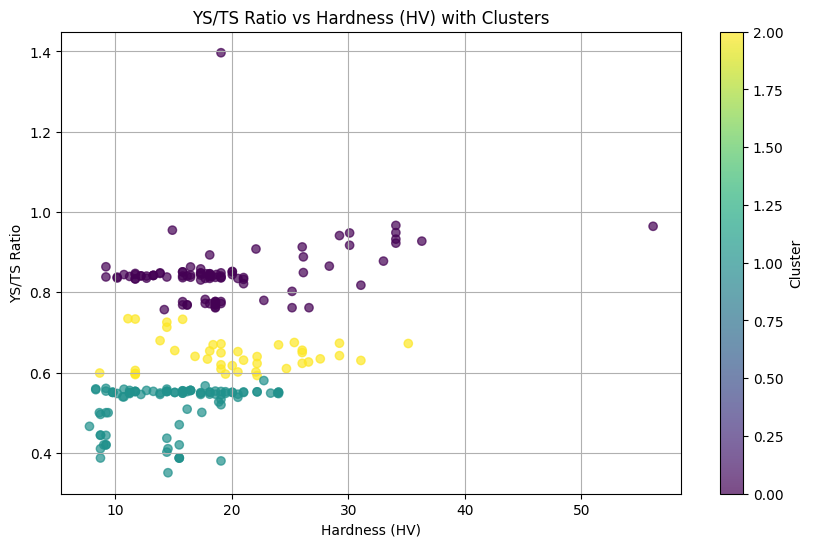

In [15]:
# Scatter plot of YS/TS Ratio vs Hardness (HV) with clusters
plt.figure(figsize=(10, 6))
plt.scatter( merged_data['HV (GPa)'],merged_data['YS/TS Ratio'], c=merged_data['Cluster_YS_TS'], cmap='viridis', alpha=0.7)
plt.title('YS/TS Ratio vs Hardness (HV) with Clusters')
plt.ylabel('YS/TS Ratio')
plt.xlabel('Hardness (HV)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

<strong><h1>All Together</h1></strong>

In [16]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# Columns to check for outliers
columns_to_check = ['Tensile Strength (MPa)', 'Yield Strength (MPa)', 'HV (GPa)', 'YS/TS Ratio']


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
from keras import regularizers


# Columns to check for outliers
columns_to_check = ['Yield Strength (MPa)']

all = remove_outliers(merged_data, columns_to_check)


# Prepare the data
X = all[['HV (GPa)']]
y = all['Yield Strength (MPa)']

# Split the data into training and testing sets
X_trainall, X_testall, y_trainall, y_testall = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_trainall = scaler.fit_transform(X_trainall)
X_testall = scaler.transform(X_testall)



model = Sequential([
    Dense(64, activation='relu', input_dim=X_trainall.shape[1]),
    Dense(64, activation='relu', input_dim=X_trainall.shape[1]),
    Dense(64, activation='relu', input_dim=X_trainall.shape[1]),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    Dense(32, activation='tanh', kernel_regularizer=regularizers.l1(0.001)),
    Dense(32, activation='tanh', kernel_regularizer=regularizers.l1(0.001)),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    Dense(1, activation='relu', kernel_regularizer=regularizers.l1(0.001))
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])


/opt/anaconda3/envs/Python-mediapipe-0-10-9/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:

# Train the model
history = model.fit(X_trainall, y_trainall, validation_data=(X_testall, y_testall), epochs=1000, batch_size=8, verbose=1)


Epoch 1/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 211652.0625 - mse: 211651.2500 - val_loss: 168017.2969 - val_mse: 168016.4844
Epoch 2/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 189859.1719 - mse: 189858.3750 - val_loss: 162258.9219 - val_mse: 162258.1562
Epoch 3/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 178461.8281 - mse: 178461.0469 - val_loss: 158636.6406 - val_mse: 158635.8906
Epoch 4/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 165825.5469 - mse: 165824.8125 - val_loss: 155169.7812 - val_mse: 155169.0625
Epoch 5/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 186206.7812 - mse: 186206.0625 - val_loss: 151476.4688 - val_mse: 151475.7500
Epoch 6/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 169836.3125 - mse: 169835.6094 - val_loss: 147478.9531 - val_mse: 147478.2500
Epoch 7/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 166418.9531 - mse: 166418.2344 - val_loss: 143200.2812 - val_mse: 143199.5938
Epoch 8/1000
22/22 ━━━━━━━━━━━━━━━

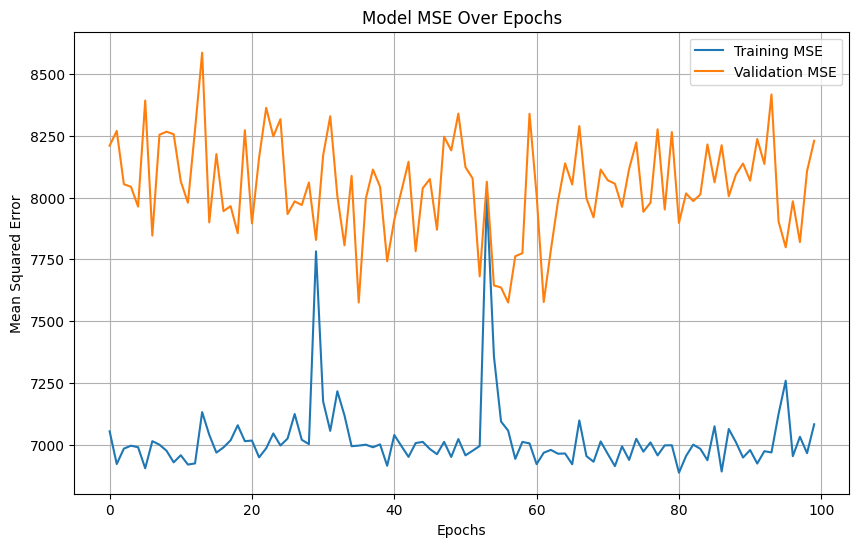

Mean Sqaured Error on Test Data: 8230.30078125
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
R² Score: 0.5081043243408203


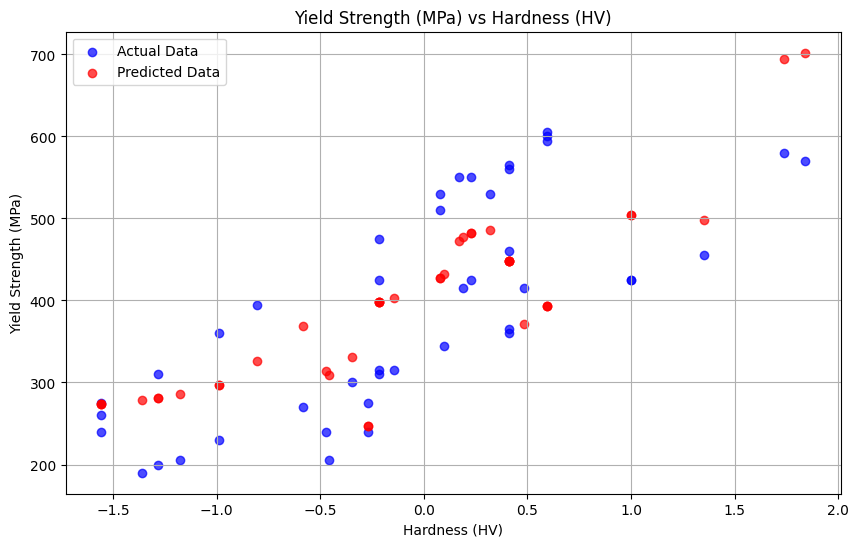

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step


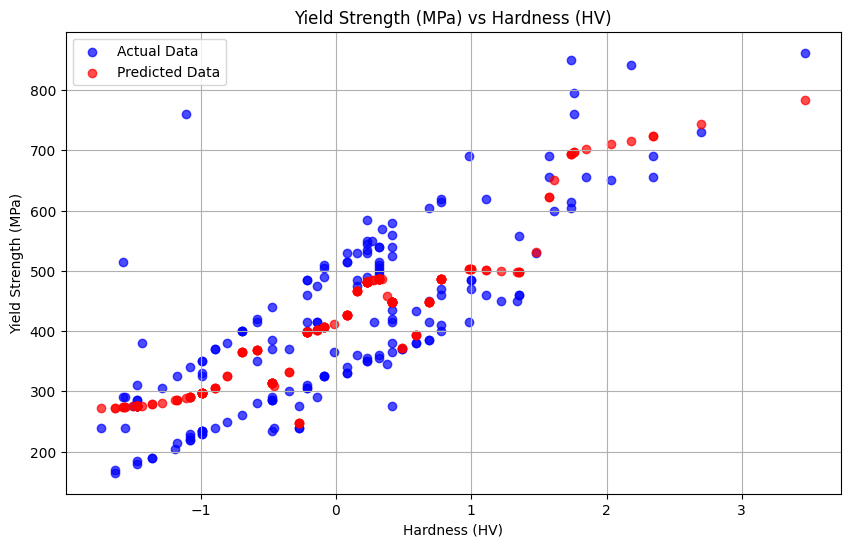

MSE for y_trainall and y_train_predall: 6837.931496651112
R² Score: 0.6884887218475342


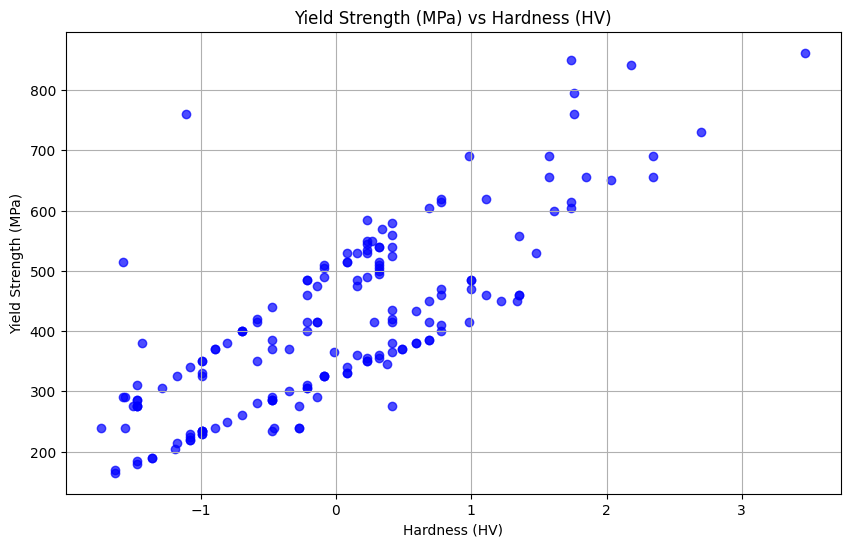

In [79]:
# Retain only the last 100 points in the history
for key in history.history.keys():
    history.history[key] = history.history[key][-100:]
# Plot training and validation MAE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Model MSE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


# Evaluate the model
loss, mse = model.evaluate(X_testall, y_testall, verbose=0)
print(f"Mean Sqaured Error on Test Data: {mse}")

# Predict the Yield Strength (MPa) for the test set
y_predall = model.predict(X_testall)

# Calculate R² score
r2 = r2_score(np.array(y_testall), y_predall.flatten())
print(f"R² Score: {r2}")
x_testall_second_elements = [row[0] for row in X_testall]
x_trainall_second_elements = [row[0] for row in X_trainall]

plt.figure(figsize=(10, 6))

# Plot actual data
plt.scatter(x_testall_second_elements, y_testall, color='blue', label='Actual Data', alpha=0.7)

# Plot predicted data
plt.scatter(x_testall_second_elements, y_predall.flatten(), color='red', label='Predicted Data', alpha=0.7)

# Add labels, title, and legend
plt.title('Yield Strength (MPa) vs Hardness (HV)')
plt.xlabel('Hardness (HV)')
plt.ylabel('Yield Strength (MPa)')
plt.legend()
plt.grid(True)
plt.show()

# Predict the Yield Strength (MPa) for the training set
y_train_predall = model.predict(X_trainall)
plt.figure(figsize=(10, 6))

# Plot actual data
plt.scatter(x_trainall_second_elements, y_trainall, color='blue', label='Actual Data', alpha=0.7)

# Plot predicted data
plt.scatter(x_trainall_second_elements, y_train_predall.flatten(), color='red', label='Predicted Data', alpha=0.7)

# Add labels, title, and legend
plt.title('Yield Strength (MPa) vs Hardness (HV)')
plt.xlabel('Hardness (HV)')
plt.ylabel('Yield Strength (MPa)')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import mean_squared_error

mse_trainall = mean_squared_error(y_trainall, y_train_predall.flatten())
print(f"MSE for y_trainall and y_train_predall: {mse_trainall}")

r2 = r2_score(y_trainall, y_train_predall)
print(f"R² Score: {r2}")
plt.figure(figsize=(10, 6))

# Extract HV and Yield Strength values from X_train1 and y_train1
hv_values = [row[0] for row in X_trainall]
ys_values = y_trainall.values

# Scatter plot
plt.scatter(hv_values, ys_values, color='blue', alpha=0.7)

# Add labels, title, and grid
plt.title('Yield Strength (MPa) vs Hardness (HV)')
plt.xlabel('Hardness (HV)')
plt.ylabel('Yield Strength (MPa)')
plt.grid(True)
plt.show()

In [80]:
# Separate clusters into three datasets
trainx1 = merged_data[merged_data['Cluster_YS_TS'] == 0]
trainx2 = merged_data[merged_data['Cluster_YS_TS'] == 1]
trainx3 = merged_data[merged_data['Cluster_YS_TS'] == 2]



<strong><h1>Trainx1</h1></strong>

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
from keras import regularizers


In [62]:

trainx1 = remove_outliers(trainx1, columns_to_check)

In [63]:


# Prepare the data
X = trainx1[[ 'HV (GPa)']]
y = trainx1['Yield Strength (MPa)']

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)




In [64]:
model1 = Sequential([
     Dense(64, activation='relu', input_dim=X_trainall.shape[1]),
    Dense(64, activation='relu', input_dim=X_trainall.shape[1]),
    Dense(64, activation='relu', input_dim=X_trainall.shape[1]),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    Dense(32, activation='tanh', kernel_regularizer=regularizers.l1(0.001)),
    Dense(32, activation='tanh', kernel_regularizer=regularizers.l1(0.001)),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    Dense(1, activation='relu', kernel_regularizer=regularizers.l1(0.001))
])

/opt/anaconda3/envs/Python-mediapipe-0-10-9/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:

# Compile the model
model1.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Train the model
history = model1.fit(X_train1, y_train1, validation_data=(X_test1, y_test1), epochs=1000, batch_size=8, verbose=1)


Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 248423.3750 - mse: 248422.5781 - val_loss: 258932.5156 - val_mse: 258931.7031
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 244801.0000 - mse: 244800.1875 - val_loss: 257892.1406 - val_mse: 257891.3438
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 254243.6875 - mse: 254242.9062 - val_loss: 255556.0625 - val_mse: 255555.2812
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 245091.3438 - mse: 245090.5781 - val_loss: 251882.9219 - val_mse: 251882.1562
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 242811.0312 - mse: 242810.2500 - val_loss: 248239.9375 - val_mse: 248239.1719
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 259000.3906 - mse: 258999.6250 - val_loss: 245362.4062 - val_mse: 245361.6562
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 238461.8594 - mse: 238461.0938 - val_loss: 242880.5625 - val_mse: 242879.7812
Epoch 8/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

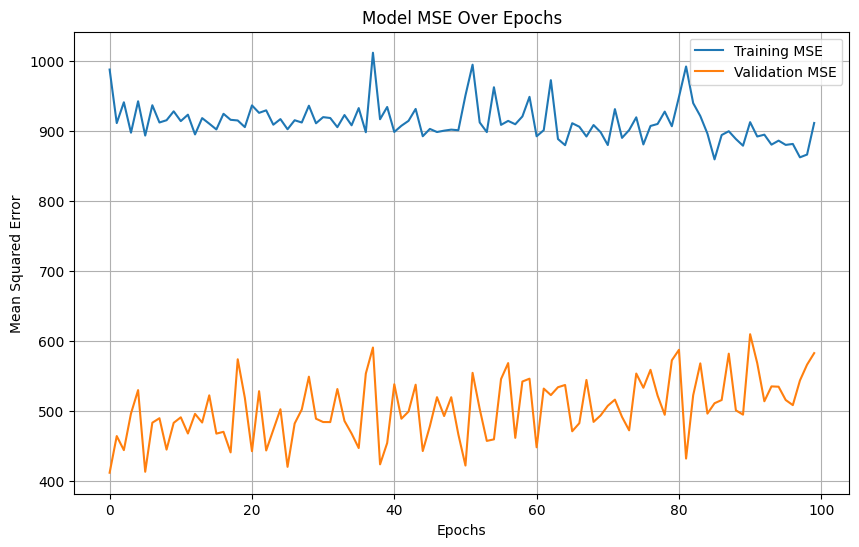

In [66]:
# Retain only the last 100 points in the history
for key in history.history.keys():
    history.history[key] = history.history[key][-100:]
# Plot training and validation MAE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Model MSE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

In [67]:




# Evaluate the model
loss, mse = model1.evaluate(X_test1, y_test1, verbose=0)
print(f"Mean Sqaured Error on Test Data: {mse}")

# Predict the Yield Strength (MPa) for the test set
y_pred1 = model1.predict(X_test1)

# Calculate R² score
r2 = r2_score(np.array(y_test1), y_pred1.flatten())
print(f"R² Score: {r2}")

Mean Sqaured Error on Test Data: 582.1860961914062
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
R² Score: 0.9354352951049805


[2.2032685238842364, -0.12421737061611979, -1.650013680805638, 1.5567446644491643, 0.36714076127270295, 0.5740283980010358, -0.8224631392332749, 0.4447236250458272, 0.31541885476110354, 0.10853121803277072, 0.21197503639693666, 0.31541885476110354, -1.3914041348952222, -1.5207089078504303, 0.5740283980010358, 0.10853121803277072]
[-1.805179405681404, 1.0912474844808993, 0.10853121803277072, -0.3052440527534109, 0.832637941240967, 1.0912474844808993, 0.31541885476110354, -1.1327945916552902, -0.9776288667795248, 0.4447236250458272, 0.23783599098797836, -2.0637889499895294, -0.20180023438924496, 0.5740283980010358, 0.31541885476110354, 0.21197503639693666, 2.591182840079376, -0.3052440527534109, -1.3914041348952222, 0.31541885476110354, 0.5740283980010358, -1.262099364610498, 0.4447236250458272, 2.4618780671241685, -0.9776288667795248, 0.832637941240967, -1.805179405681404, -0.20180023438924496, -2.0637889499895294, 0.31541885476110354, -0.12421737061611979, 0.4447236250458272, 0.4705845

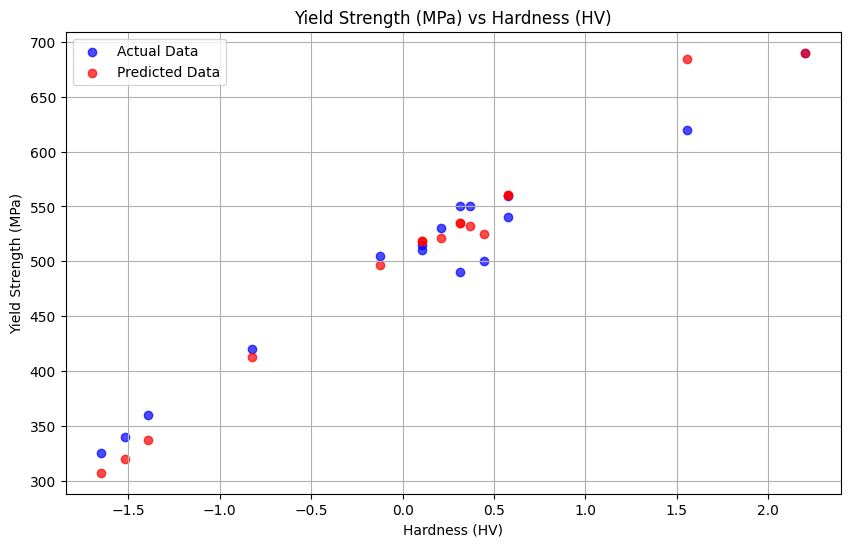

In [68]:
x_test1_second_elements = [row[0] for row in X_test1]
print(x_test1_second_elements)
x_train1_second_elements = [row[0] for row in X_train1]
print(x_train1_second_elements)

plt.figure(figsize=(10, 6))

# Plot actual data
plt.scatter(x_test1_second_elements, y_test1, color='blue', label='Actual Data', alpha=0.7)

# Plot predicted data
plt.scatter(x_test1_second_elements, y_pred1.flatten(), color='red', label='Predicted Data', alpha=0.7)

# Add labels, title, and legend
plt.title('Yield Strength (MPa) vs Hardness (HV)')
plt.xlabel('Hardness (HV)')
plt.ylabel('Yield Strength (MPa)')
plt.legend()
plt.grid(True)
plt.show()


In [69]:
# Predict the Yield Strength (MPa) for the training set
y_train_pred1 = model1.predict(X_train1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


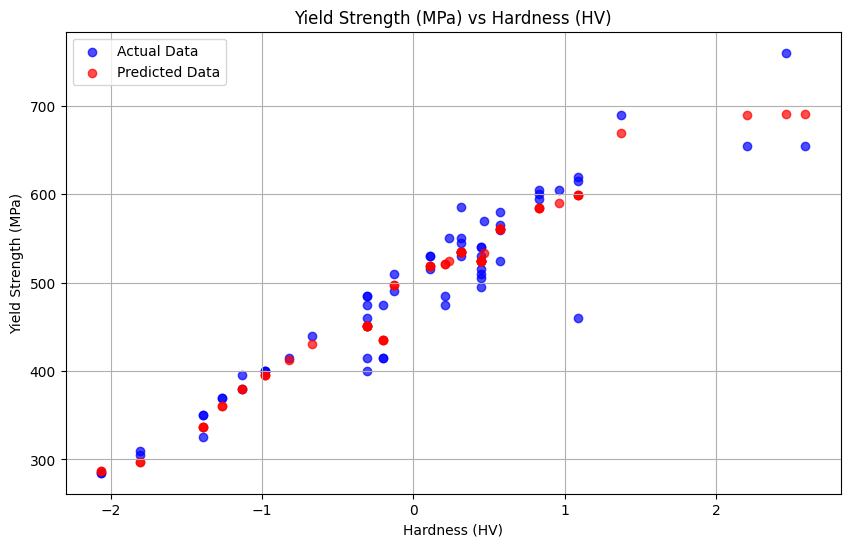

In [70]:
plt.figure(figsize=(10, 6))

# Plot actual data
plt.scatter(x_train1_second_elements, y_train1, color='blue', label='Actual Data', alpha=0.7)

# Plot predicted data
plt.scatter(x_train1_second_elements, y_train_pred1.flatten(), color='red', label='Predicted Data', alpha=0.7)

# Add labels, title, and legend
plt.title('Yield Strength (MPa) vs Hardness (HV)')
plt.xlabel('Hardness (HV)')
plt.ylabel('Yield Strength (MPa)')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
from sklearn.metrics import mean_squared_error

mse_train1 = mean_squared_error(y_train1, y_train_pred1.flatten())
print(f"MSE for y_train1 and y_train_pred1: {mse_train1}")

MSE for y_train1 and y_train_pred1: 848.9690264540374


In [72]:

r2 = r2_score(y_train1, y_train_pred1)
print(f"R² Score: {r2}")

R² Score: 0.9187811017036438


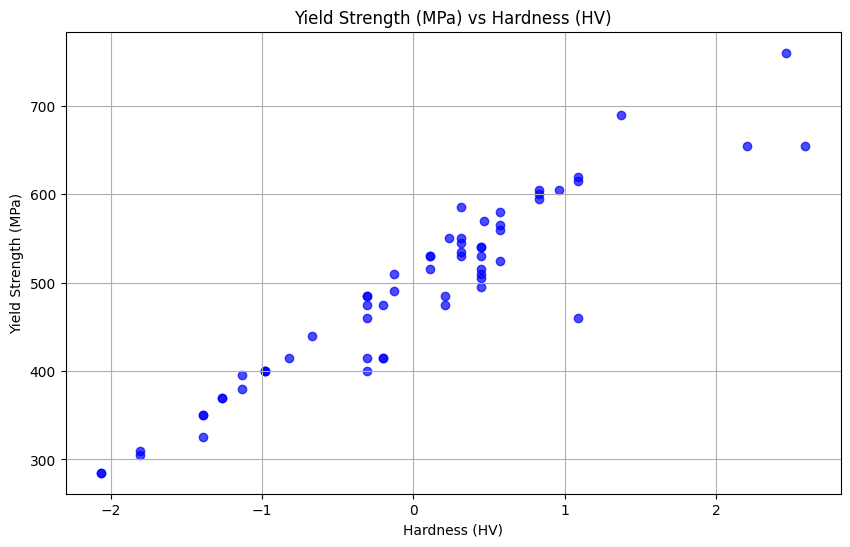

In [73]:
plt.figure(figsize=(10, 6))

# Extract HV and Yield Strength values from X_train1 and y_train1
hv_values = [row[0] for row in X_train1]
ys_values = y_train1.values

# Scatter plot
plt.scatter(hv_values, ys_values, color='blue', alpha=0.7)

# Add labels, title, and grid
plt.title('Yield Strength (MPa) vs Hardness (HV)')
plt.xlabel('Hardness (HV)')
plt.ylabel('Yield Strength (MPa)')
plt.grid(True)
plt.show()

<strong><h1>Trainx2</h1></strong>

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
from keras import regularizers


# Columns to check for outliers
columns_to_check = ['Yield Strength (MPa)']

trainx2 = remove_outliers(trainx2, columns_to_check)


# Prepare the data
X = trainx2[[ 'HV (GPa)']]
y = trainx2['Yield Strength (MPa)']

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)



model2 = Sequential([
     Dense(64, activation='relu', input_dim=X_trainall.shape[1]),
    Dense(64, activation='relu', input_dim=X_trainall.shape[1]),
    Dense(64, activation='relu', input_dim=X_trainall.shape[1]),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    Dense(32, activation='tanh', kernel_regularizer=regularizers.l1(0.001)),
    Dense(32, activation='tanh', kernel_regularizer=regularizers.l1(0.001)),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    Dense(1, activation='relu', kernel_regularizer=regularizers.l1(0.001))
])

# Compile the model
model2.compile(optimizer='adam', loss='mse', metrics=['mse'])


/opt/anaconda3/envs/Python-mediapipe-0-10-9/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:

# Train the model
history = model2.fit(X_train2, y_train2, validation_data=(X_test2, y_test2), epochs=1000, batch_size=8, verbose=1)


Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 89158.6016 - mse: 89157.7891 - val_loss: 96136.3047 - val_mse: 96135.5234
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 98650.3828 - mse: 98649.6172 - val_loss: 96136.2422 - val_mse: 96135.5234
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 91705.8516 - mse: 91705.1406 - val_loss: 96136.1953 - val_mse: 96135.5234
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 94807.5469 - mse: 94806.8906 - val_loss: 96136.1484 - val_mse: 96135.5234
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 101634.4609 - mse: 101633.8438 - val_loss: 96136.0938 - val_mse: 96135.5234
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92563.6719 - mse: 92563.1094 - val_loss: 96136.0625 - val_mse: 96135.5234
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 100003.2812 - mse: 100002.7656 - val_loss: 96136.0156 - val_mse: 96135.5234
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - los

Minimum Validation MSE: 643.6259765625


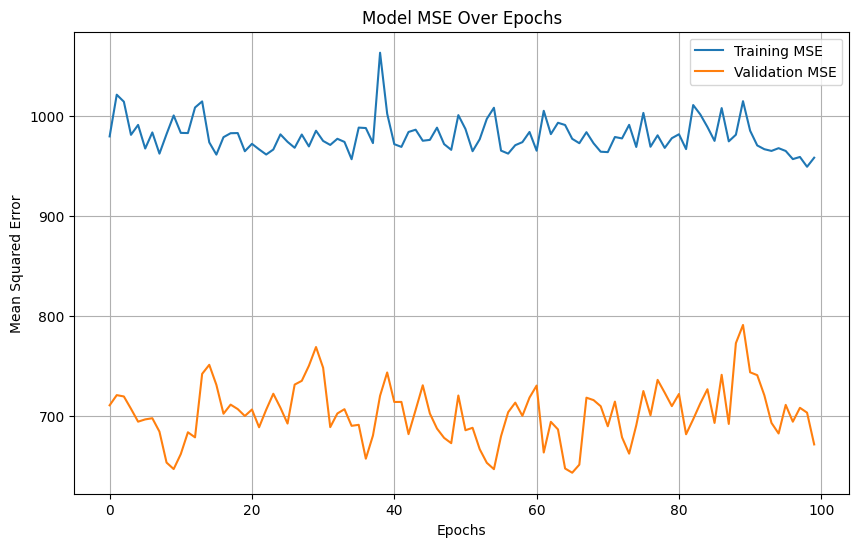

Mean Sqaured Error on Test Data: 671.9189453125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
R² Score: 0.8663345575332642
[0.9143730686243853, -0.11062453140234409, 2.0034330168611456, -1.5754090370948897, 0.8716648350143014, -0.3668739308577529, 0.8076024845991754, 0.33781191929844173, -1.4559338784329856, 0.8076024845991754, 0.12427075345311647, 0.1883331016631487, -1.3670378146566255, 0.2737495688833158, -1.2637468287311742, 0.2737495688833158, -0.9220809633786541, 0.1883331016631487, 1.341455400315035]
[0.70083190277906, -1.0502056620038118, 0.33781191929844173, 0.12427075345311647, -0.11062453140234409, 0.70083190277906, -1.2637468287311742, 0.9143730686243853, 0.70083190277906, 0.03885428623294896, -1.262852203547748, -1.4559338784329856, -1.262852203547748, 0.9143730686243853, 0.5299989683387251, 1.1279142344697097, -0.8153103793534451, 0.9997895336394588, 0.1883331016631487, 0.9143730686243853, -1.387874936922503, -0.23874923002750145, -0.8153103793534451, -1.3045264480795027, -0.1106

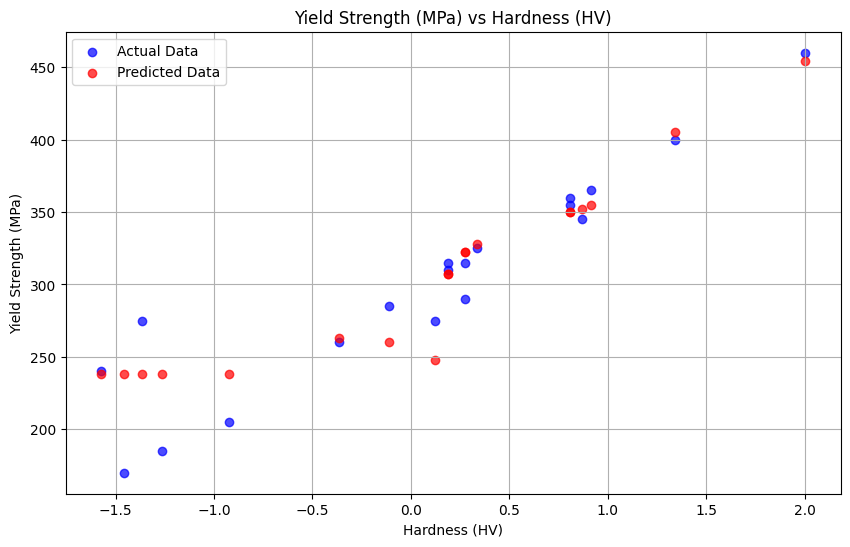

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step


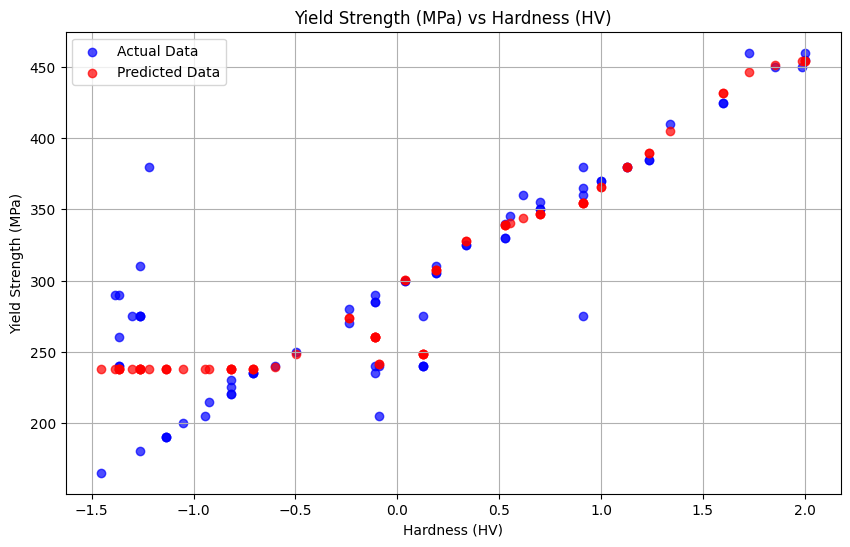

MSE for y_train2 and y_train_pred2: 944.051745410285
R² Score: 0.834814190864563


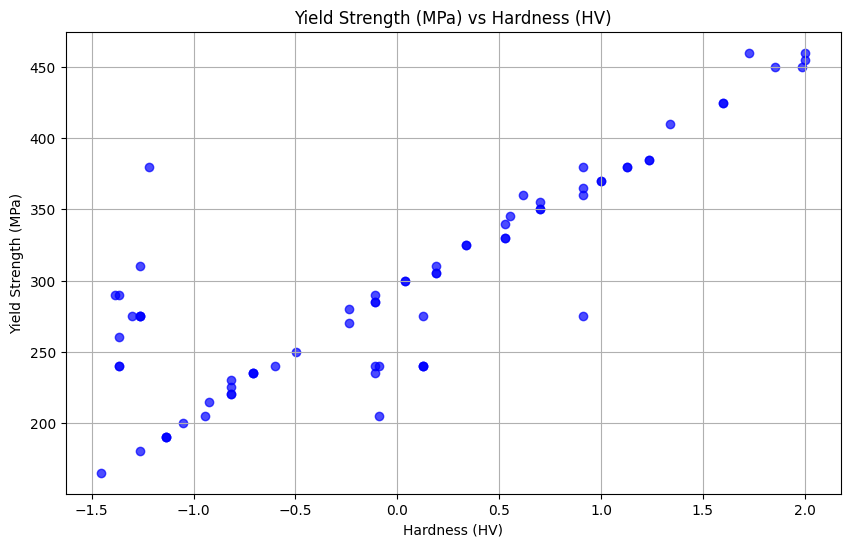

In [60]:

# Retain only the last 100 points in the history
min_val_mse = min(history.history['val_mse'])
print(f"Minimum Validation MSE: {min_val_mse}")
for key in history.history.keys():
    history.history[key] = history.history[key][-100:]
# Plot training and validation MAE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Model MSE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()



# Evaluate the model
loss, mse = model2.evaluate(X_test2, y_test2, verbose=0)
print(f"Mean Sqaured Error on Test Data: {mse}")

# Predict the Yield Strength (MPa) for the test set
y_pred2 = model2.predict(X_test2)

# Calculate R² score
r2 = r2_score(np.array(y_test2), y_pred2.flatten())
print(f"R² Score: {r2}")
x_test2_second_elements = [row[0] for row in X_test2]
print(x_test2_second_elements)
x_train2_second_elements = [row[0] for row in X_train2]
print(x_train2_second_elements)

plt.figure(figsize=(10, 6))

# Plot actual data
plt.scatter(x_test2_second_elements, y_test2, color='blue', label='Actual Data', alpha=0.7)

# Plot predicted data
plt.scatter(x_test2_second_elements, y_pred2.flatten(), color='red', label='Predicted Data', alpha=0.7)

# Add labels, title, and legend
plt.title('Yield Strength (MPa) vs Hardness (HV)')
plt.xlabel('Hardness (HV)')
plt.ylabel('Yield Strength (MPa)')
plt.legend()
plt.grid(True)
plt.show()

# Predict the Yield Strength (MPa) for the training set
y_train_pred2 = model2.predict(X_train2)
plt.figure(figsize=(10, 6))

# Plot actual data
plt.scatter(x_train2_second_elements, y_train2, color='blue', label='Actual Data', alpha=0.7)

# Plot predicted data
plt.scatter(x_train2_second_elements, y_train_pred2.flatten(), color='red', label='Predicted Data', alpha=0.7)

# Add labels, title, and legend
plt.title('Yield Strength (MPa) vs Hardness (HV)')
plt.xlabel('Hardness (HV)')
plt.ylabel('Yield Strength (MPa)')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import mean_squared_error

mse_train2 = mean_squared_error(y_train2, y_train_pred2.flatten())
print(f"MSE for y_train2 and y_train_pred2: {mse_train2}")

r2 = r2_score(y_train2, y_train_pred2)
print(f"R² Score: {r2}")
plt.figure(figsize=(10, 6))

# Extract HV and Yield Strength values from X_train1 and y_train1
hv_values = [row[0] for row in X_train2]
ys_values = y_train2.values

# Scatter plot
plt.scatter(hv_values, ys_values, color='blue', alpha=0.7)

# Add labels, title, and grid
plt.title('Yield Strength (MPa) vs Hardness (HV)')
plt.xlabel('Hardness (HV)')
plt.ylabel('Yield Strength (MPa)')
plt.grid(True)
plt.show()

<strong><h1>Trainx3</h1></strong>

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score
from keras import regularizers


# Columns to check for outliers
columns_to_check = ['Tensile Strength (MPa)','Yield Strength (MPa)', 'HV (GPa)', 'YS/TS Ratio']

trainx3 = remove_outliers(trainx3, columns_to_check)



# Prepare the data
X = trainx3[[ 'HV (GPa)']]
y = trainx3['Yield Strength (MPa)']

# Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train3 = scaler.fit_transform(X_train3)
X_test3 = scaler.transform(X_test3)



model3 = Sequential([
    Dense(64, activation='relu', input_dim=X_trainall.shape[1]),
    Dense(64, activation='relu', input_dim=X_trainall.shape[1]),
    Dense(64, activation='relu', input_dim=X_trainall.shape[1]),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    Dense(32, activation='tanh', kernel_regularizer=regularizers.l1(0.001)),
    Dense(32, activation='tanh', kernel_regularizer=regularizers.l1(0.001)),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    Dense(1, activation='relu', kernel_regularizer=regularizers.l1(0.001))
])
# Compile the model
model3.compile(optimizer='adam', loss='mse', metrics=['mse'])


/opt/anaconda3/envs/Python-mediapipe-0-10-9/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:

# Train the model
history = model3.fit(X_train3, y_train3, validation_data=(X_test3, y_test3), epochs=1000, batch_size=8, verbose=0)


Minimum Validation MSE: 411.34765625


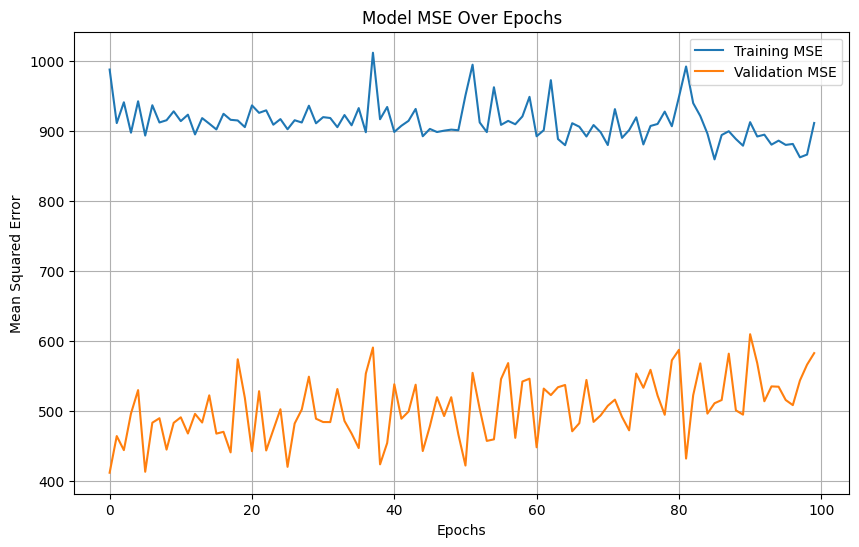

Mean Sqaured Error on Test Data: 32785.9453125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
R² Score: -0.7274911403656006


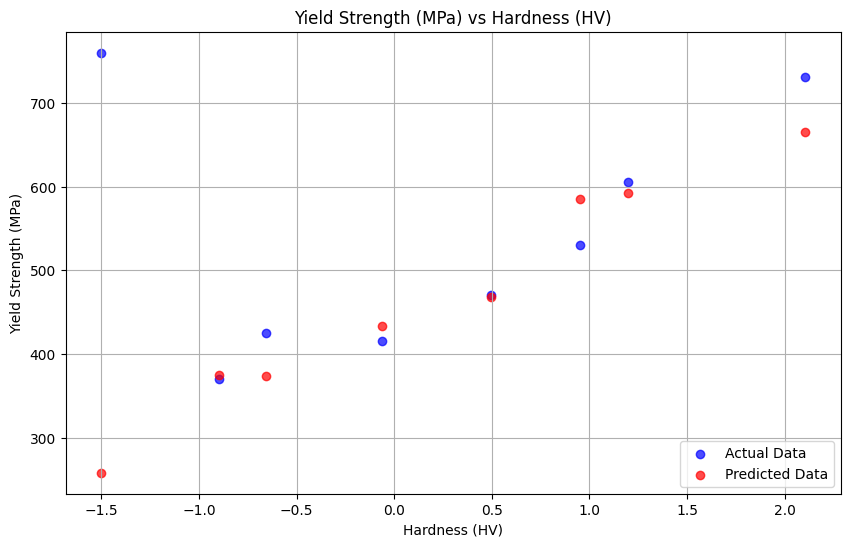

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


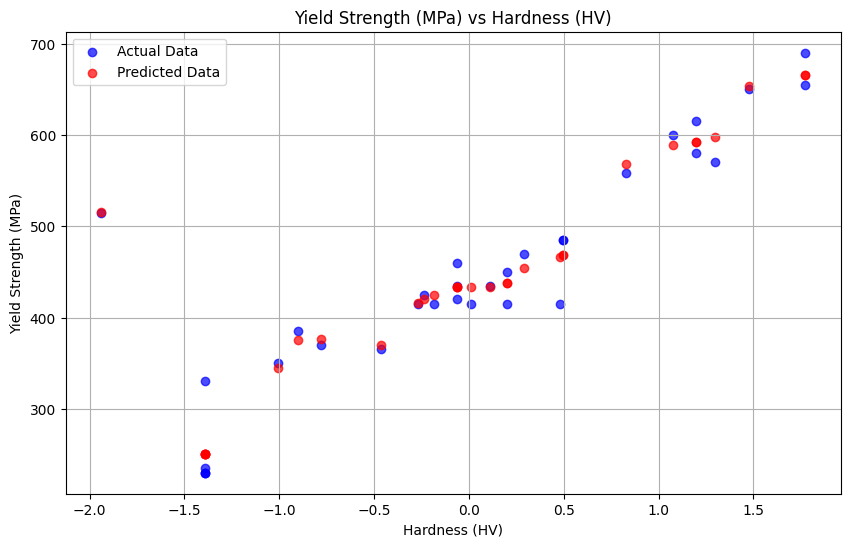

MSE for y_train3 and y_train_pred3: 496.14298940089793
R² Score: 0.966990053653717


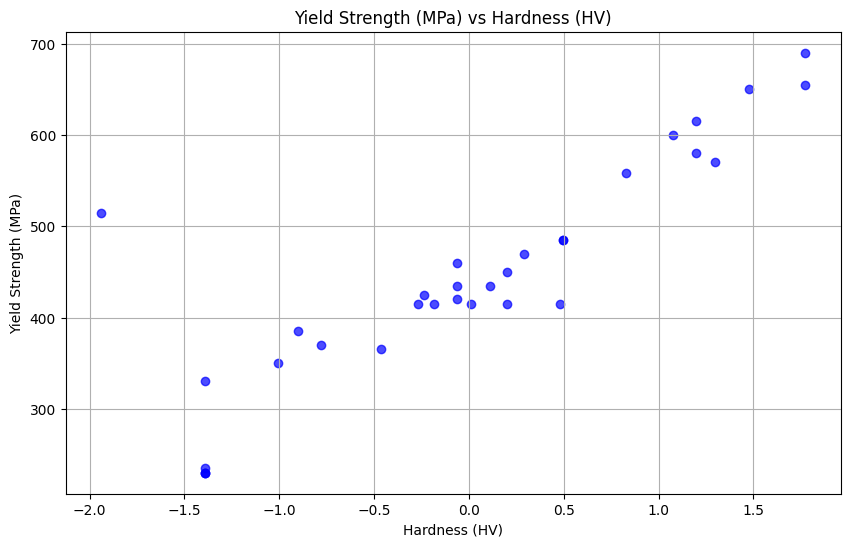

In [74]:



# Retain only the last 100 points in the history
min_val_mse = min(history.history['val_mse'])
print(f"Minimum Validation MSE: {min_val_mse}")
for key in history.history.keys():
    history.history[key] = history.history[key][-100:]
# Plot training and validation MAE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Model MSE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


# Evaluate the model
loss, mse = model3.evaluate(X_test3, y_test3, verbose=0)
print(f"Mean Sqaured Error on Test Data: {mse}")

# Predict the Yield Strength (MPa) for the test set
y_pred3 = model3.predict(X_test3)

# Calculate R² score
r2 = r2_score(np.array(y_test3), y_pred3.flatten())
print(f"R² Score: {r2}")
x_test3_second_elements = [row[0] for row in X_test3]
x_train3_second_elements = [row[0] for row in X_train3]

plt.figure(figsize=(10, 6))

# Plot actual data
plt.scatter(x_test3_second_elements, y_test3, color='blue', label='Actual Data', alpha=0.7)

# Plot predicted data
plt.scatter(x_test3_second_elements, y_pred3.flatten(), color='red', label='Predicted Data', alpha=0.7)

# Add labels, title, and legend
plt.title('Yield Strength (MPa) vs Hardness (HV)')
plt.xlabel('Hardness (HV)')
plt.ylabel('Yield Strength (MPa)')
plt.legend()
plt.grid(True)
plt.show()

# Predict the Yield Strength (MPa) for the training set
y_train_pred3 = model3.predict(X_train3)
plt.figure(figsize=(10, 6))

# Plot actual data
plt.scatter(x_train3_second_elements, y_train3, color='blue', label='Actual Data', alpha=0.7)

# Plot predicted data
plt.scatter(x_train3_second_elements, y_train_pred3.flatten(), color='red', label='Predicted Data', alpha=0.7)

# Add labels, title, and legend
plt.title('Yield Strength (MPa) vs Hardness (HV)')
plt.xlabel('Hardness (HV)')
plt.ylabel('Yield Strength (MPa)')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import mean_squared_error

mse_train3 = mean_squared_error(y_train3, y_train_pred3.flatten())
print(f"MSE for y_train3 and y_train_pred3: {mse_train3}")
r2 = r2_score(y_train3, y_train_pred3)
print(f"R² Score: {r2}")
plt.figure(figsize=(10, 6))

# Extract HV and Yield Strength values from X_train1 and y_train1
hv_values = [row[0] for row in X_train3]
ys_values = y_train3.values

# Scatter plot
plt.scatter(hv_values, ys_values, color='blue', alpha=0.7)

# Add labels, title, and grid
plt.title('Yield Strength (MPa) vs Hardness (HV)')
plt.xlabel('Hardness (HV)')
plt.ylabel('Yield Strength (MPa)')
plt.grid(True)
plt.show()

In [75]:
import numpy as np

# Actual and predicted values for testing
y_true = np.array(y_test3[:-2])  # Replace with the appropriate test set
y_pred = y_pred3.flatten()[:-2]  # Replace with the corresponding predictions

# Calculate the mean of actual values
y_mean = np.mean(y_true)

# Calculate the total sum of squares (SST) and residual sum of squares (SSR)
sst = np.sum((y_true - y_mean) ** 2)
ssr = np.sum((y_true - y_pred) ** 2)

# Calculate R^2
r2_manual = 1 - (ssr / sst)
print(f"Manual R²: {r2_manual}")

Manual R²: 0.9113495797017472


In [76]:
# Calculate MSE manually
mse_manual = np.mean((y_true - y_pred) ** 2)
print(f"Manual MSE: {mse_manual}")

Manual MSE: 1298.2977178262856


In [84]:
# Export models with specified names
model.save("Models/All_Data_Model.keras")
model1.save("Models/Cluster_0_Model.keras")
model2.save("Models/Cluster_1_Model.keras")
model3.save("Models/Cluster_2_Model.keras")

print("Models exported successfully!")

Models exported successfully!
